In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mrcfile
import torch

from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
# from cryoS2Sdrop.dataloader import singleCET_dataset, singleCET_FourierDataset
from cryoS2Sdrop.deconvolution import tom_deconv_tomo
from cryoS2Sdrop.analyze import *

import tomopy.sim.project as proj
from tomopy.recon.algorithm import recon
import matplotlib.pyplot as plt

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

In [32]:
model_name = 'model_4'
cet_path = os.path.join(PARENT_PATH, 'data/shrec2021/%s/reconstruction.mrc' %model_name)
out_path = os.path.join(PARENT_PATH, 'data/isoNet/SHREC_dataset/SHREC_tomoset/%s.mrc' %model_name)

with mrcfile.open(cet_path, mode='r+', permissive=True) as original:
    original.update_header_from_data()
    data = original.data
    
with mrcfile.new(out_path, overwrite=True) as output:
    output.set_data(data)

In [18]:
tomo_data = read_array(cet_path)
tomo_data = standardize(clip(tomo_data))
tomo_shape = np.array(tomo_data.shape)
tomo_shape

array([512, 512, 512])

# Deconvolution

In [19]:
angpix = 10
defocus = 0
snrfalloff = 0.3
deconvstrength = 1
highpassnyquist = 0.02

deconv_tomo_data = tom_deconv_tomo(tomo_data, angpix, defocus, snrfalloff, 1, 0.1, False, 0)

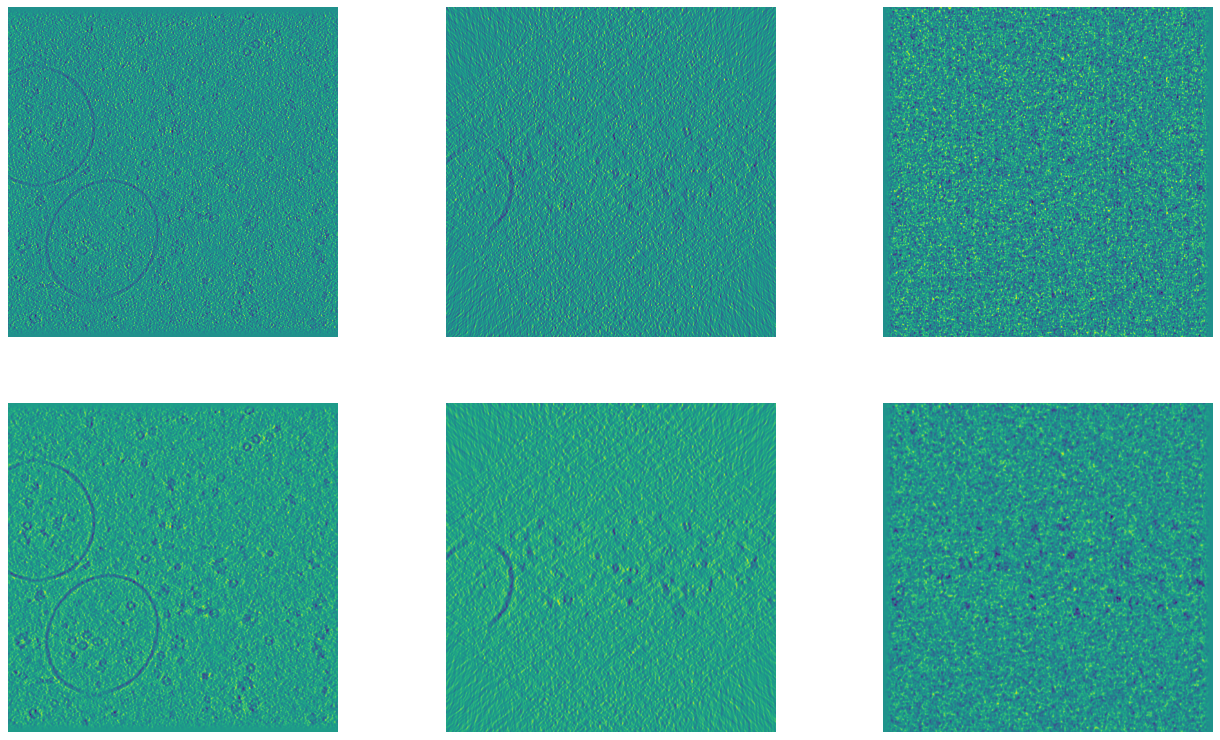

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 3, figsize=(20, 12))
list(map(lambda axi: axi.set_axis_off(), np.array([ax0, ax1]).ravel()))
zidx, yidx, xidx = np.array(tomo_data.shape)//2

ax0[0].imshow(tomo_data[zidx])
ax0[1].imshow(tomo_data[:, yidx, :])
ax0[2].imshow(tomo_data[:, :, xidx])

ax1[0].imshow(deconv_tomo_data[zidx])
ax1[1].imshow(deconv_tomo_data[:, yidx, :])
ax1[2].imshow(deconv_tomo_data[:, :, xidx])

In [13]:
angpix = 10
defocus = 0
snrfalloff = 0.3
deconvstrength = 1
highpassnyquist = 0.1

deconv_tomo_data = tom_deconv_tomo(tomo_data, angpix, defocus, snrfalloff, 1, 0.1, False, 0)

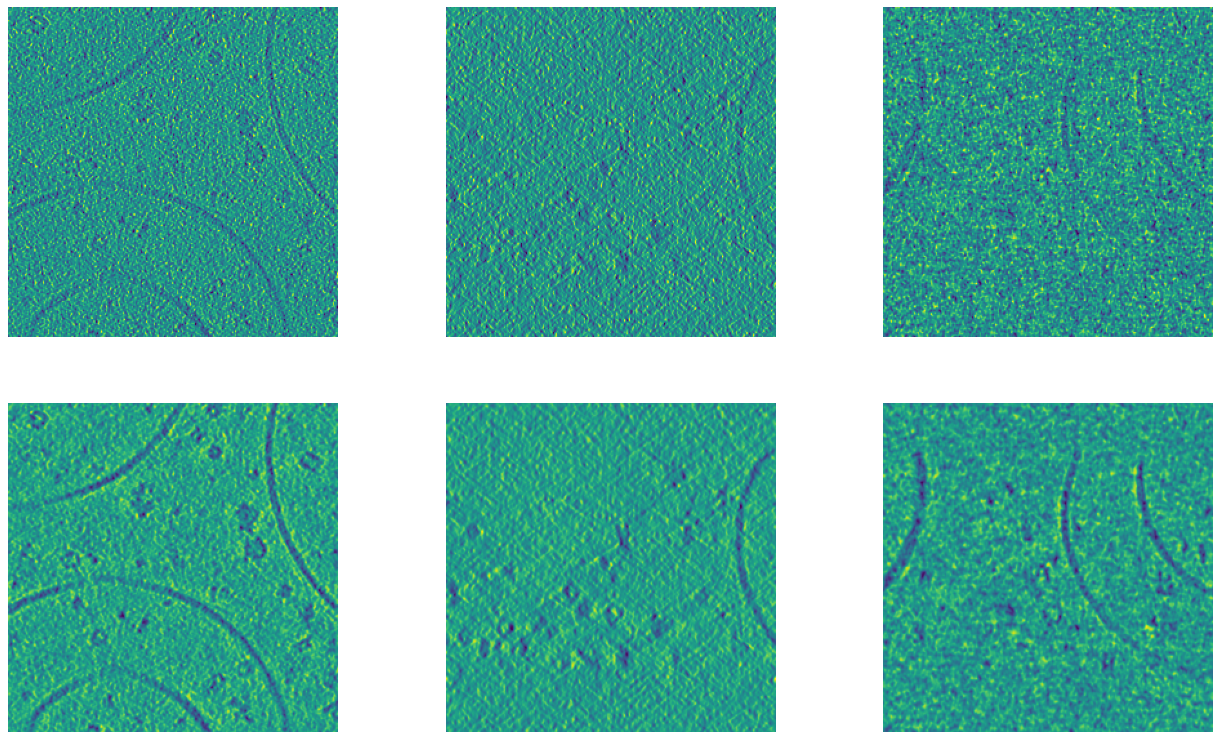

In [14]:
fig, (ax0, ax1) = plt.subplots(2, 3, figsize=(20, 12))
list(map(lambda axi: axi.set_axis_off(), np.array([ax0, ax1]).ravel()))
zidx, yidx, xidx = np.array(tomo_data.shape)//2

ax0[0].imshow(tomo_data[zidx])
ax0[1].imshow(tomo_data[:, yidx, :])
ax0[2].imshow(tomo_data[:, :, xidx])

ax1[0].imshow(deconv_tomo_data[zidx])
ax1[1].imshow(deconv_tomo_data[:, yidx, :])
ax1[2].imshow(deconv_tomo_data[:, :, xidx])